# Pycaret Test

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Read the Data

df = pd.read_csv("Arbo Reduced.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13845 entries, 0 to 13844
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Confirmed.Diagnosis  13845 non-null  object
 1   SEX                  13845 non-null  object
 2   Abdominal.Pain       11280 non-null  object
 3   Anorexia             9040 non-null   object
 4   Arthritis            9577 non-null   object
 5   Body.Aches           11961 non-null  object
 6   Chills               8368 non-null   object
 7   Conjunctivitis       11826 non-null  object
 8   Convulsion           11741 non-null  object
 9   Cough                11896 non-null  object
 10  Diarrhea             11923 non-null  object
 11  Ecchymosis           11650 non-null  object
 12  Effusion             10180 non-null  object
 13  Encephalitis         9005 non-null   object
 14  Eye.Pain             11710 non-null  object
 15  Fever                12198 non-null  object
 16  Fout

In [4]:
#Setting up the Environment
from pycaret.classification import *

exp_class = setup(df,target='Confirmed.Diagnosis', ignore_features=['Hemm'])

,Description,Value
0,session_id,5124
1,Target,Confirmed.Diagnosis
2,Target Type,Multiclass
3,Label Encoded,"ChikV: 0, DengV: 1, Zika: 2"
4,Original Data,"(13845, 43)"
5,Missing Values,True
6,Numeric Features,0
7,Categorical Features,41
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
# Comparing models

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8732,0.9661,0.8732,0.8755,0.8732,0.8098,0.8108,1.7390
lightgbm,Light Gradient Boosting Machine,0.8723,0.9653,0.8723,0.8739,0.8723,0.8084,0.8091,0.1840
rf,Random Forest Classifier,0.8647,0.9608,0.8648,0.8670,0.8649,0.7971,0.7980,0.3340
lr,Logistic Regression,0.8619,0.9593,0.8619,0.8642,0.8620,0.7929,0.7939,0.8370
et,Extra Trees Classifier,0.8615,0.9568,0.8615,0.8632,0.8617,0.7923,0.7929,0.3760
ada,Ada Boost Classifier,0.8590,0.9461,0.8591,0.8610,0.8591,0.7886,0.7894,0.1910
ridge,Ridge Classifier,0.8587,0.0000,0.8587,0.8646,0.8588,0.7881,0.7907,0.0250
svm,SVM - Linear Kernel,0.8574,0.0000,0.8574,0.8632,0.8576,0.7861,0.7887,0.1760
lda,Linear Discriminant Analysis,0.8565,0.9561,0.8565,0.8632,0.8566,0.7847,0.7877,0.1510
knn,K Neighbors Classifier,0.8220,0.9274,0.8219,0.8241,0.8220,0.7330,0.7339,0.9430


As we can see, Light Gradient Boosting performed the best among all the models.  Let's create this model.

In [5]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8711,0.9670,0.8711,0.8729,0.8712,0.8067,0.8075
1,0.8741,0.9694,0.8741,0.8747,0.8743,0.8111,0.8113
2,0.8627,0.9614,0.8626,0.8652,0.8631,0.7941,0.7949
3,0.8669,0.9647,0.8667,0.8690,0.8670,0.8003,0.8011
4,0.8535,0.9631,0.8533,0.8564,0.8531,0.7801,0.7817
5,0.8824,0.9723,0.8823,0.8826,0.8824,0.8235,0.8236
6,0.8524,0.9573,0.8523,0.8549,0.8524,0.7786,0.7797
7,0.8731,0.9636,0.8731,0.8754,0.8731,0.8096,0.8107
8,0.8607,0.9596,0.8607,0.8626,0.8612,0.7910,0.7915
9,0.8793,0.9688,0.8792,0.8801,0.8792,0.8189,0.8193


In [21]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

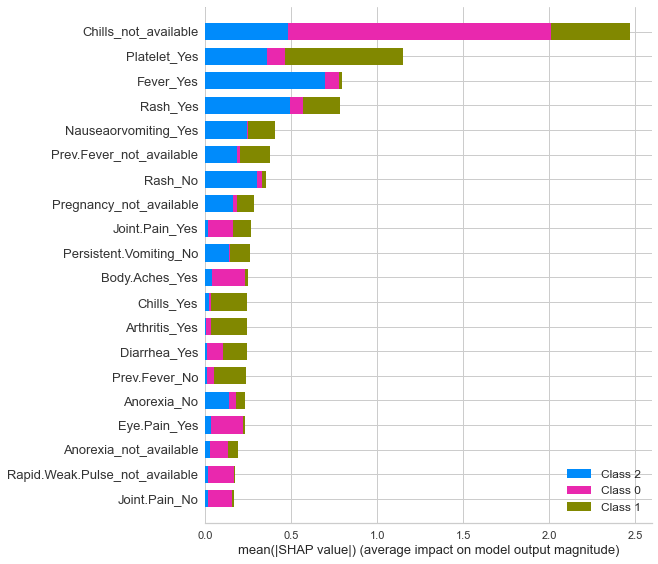

In [13]:
# Interpreting the Model
interpret_model(lgbm,)

In [14]:
#Predictions
pred_holdout = predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8731,0.9668,0.8728,0.8738,0.8732,0.8095,0.8098


In [15]:
# Finalize Model

final_lgbm = finalize_model(lgbm)

In [16]:
final_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8221, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [17]:
# Saving the Model
save_model(final_lgbm, 'Final_Model_20220115')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Confirmed.Diagnosis',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

In [19]:
pred_holdout.columns

Index(['SEX_Male', 'Abdominal.Pain_No', 'Abdominal.Pain_Unknown',
       'Abdominal.Pain_Yes', 'Abdominal.Pain_not_available', 'Anorexia_No',
       'Anorexia_Unknown', 'Anorexia_Yes', 'Anorexia_not_available',
       'Arthritis_No',
       ...
       'Vaginal.Bleeding_Unknown', 'Vaginal.Bleeding_Yes',
       'Vaginal.Bleeding_not_available', 'Vomit.Blood_No',
       'Vomit.Blood_Unknown', 'Vomit.Blood_Yes', 'Vomit.Blood_not_available',
       'Confirmed.Diagnosis', 'Label', 'Score'],
      dtype='object', length=167)

In [5]:
# Create a Decision Tree Classifier

dt = create_model('dt')

In [6]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [7]:
tuned_dt = tune_model(dt)

In [8]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

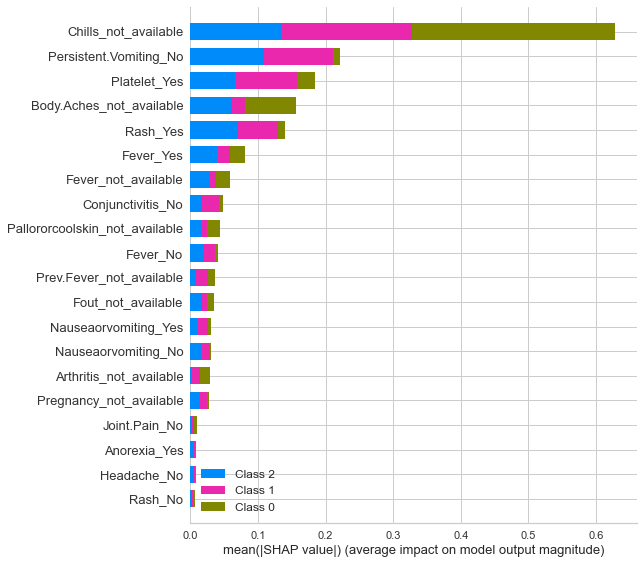

In [16]:
interpret_model(tuned_dt)

Building a gradient boosting classifier

In [6]:
gbc = create_model('gbc')

In [18]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [7]:
tuned_gbc = tune_model(gbc)

In [20]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
help(get_config)

Help on function get_config in module pycaret.classification:

get_config(variable:str)
    This function retrieves the global variables created when initializing the
    ``setup`` function. Following variables are accessible:
    
    - X: Transformed dataset (X)
    - y: Transformed dataset (y)
    - X_train: Transformed train dataset (X)
    - X_test: Transformed test/holdout dataset (X)
    - y_train: Transformed train dataset (y)
    - y_test: Transformed test/holdout dataset (y)
    - seed: random state set through session_id
    - prep_pipe: Transformation pipeline
    - fold_shuffle_param: shuffle parameter used in Kfolds
    - n_jobs_param: n_jobs parameter used in model training
    - html_param: html_param configured through setup
    - create_model_container: results grid storage container
    - master_model_container: model storage container
    - display_container: results display container
    - exp_name_log: Name of experiment
    - logging_param: log_experiment param
 

In [8]:
get_config('X')

,SEX_Male,Abdominal.Pain_No,Abdominal.Pain_Unknown,Abdominal.Pain_Yes,Abdominal.Pain_not_available,Anorexia_No,Anorexia_Unknown,Anorexia_Yes,Anorexia_not_available,Arthritis_No,...,Urine.Blood_Yes,Urine.Blood_not_available,Vaginal.Bleeding_No,Vaginal.Bleeding_Unknown,Vaginal.Bleeding_Yes,Vaginal.Bleeding_not_available,Vomit.Blood_No,Vomit.Blood_Unknown,Vomit.Blood_Yes,Vomit.Blood_not_available
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13840,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13841,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13842,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13843,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
predict_model(tuned_gbc, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8739,0.9661,0.8739,0.8757,0.8740,0.8108,0.8114


,SEX_Male,Abdominal.Pain_No,Abdominal.Pain_Unknown,Abdominal.Pain_Yes,Abdominal.Pain_not_available,Anorexia_No,Anorexia_Unknown,Anorexia_Yes,Anorexia_not_available,Arthritis_No,...,Vaginal.Bleeding_not_available,Vomit.Blood_No,Vomit.Blood_Unknown,Vomit.Blood_Yes,Vomit.Blood_not_available,Confirmed.Diagnosis,Label,Score_ChikV,Score_DengV,Score_Zika
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,Zika,Zika,0.0918,0.0919,0.8162
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,DengV,DengV,0.0761,0.8707,0.0532
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,Zika,Zika,0.0187,0.0228,0.9585
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,Zika,Zika,0.0563,0.0149,0.9288
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,DengV,DengV,0.0352,0.9207,0.0441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,ChikV,ChikV,0.9857,0.0035,0.0107
4150,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,DengV,DengV,0.0925,0.8995,0.0080
4151,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,DengV,DengV,0.0140,0.9840,0.0020
4152,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,ChikV,ChikV,0.9611,0.0101,0.0288


In [11]:
predict_model(gbc, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8724,0.9657,0.8724,0.8740,0.8725,0.8086,0.8092


,SEX_Male,Abdominal.Pain_No,Abdominal.Pain_Unknown,Abdominal.Pain_Yes,Abdominal.Pain_not_available,Anorexia_No,Anorexia_Unknown,Anorexia_Yes,Anorexia_not_available,Arthritis_No,...,Vaginal.Bleeding_not_available,Vomit.Blood_No,Vomit.Blood_Unknown,Vomit.Blood_Yes,Vomit.Blood_not_available,Confirmed.Diagnosis,Label,Score_ChikV,Score_DengV,Score_Zika
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,Zika,Zika,0.0940,0.0962,0.8099
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,DengV,DengV,0.0698,0.8617,0.0685
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,Zika,Zika,0.0190,0.0227,0.9582
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,Zika,Zika,0.0635,0.0190,0.9175
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,DengV,DengV,0.0351,0.9190,0.0459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,ChikV,ChikV,0.9847,0.0048,0.0105
4150,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,DengV,DengV,0.0950,0.8926,0.0125
4151,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,DengV,DengV,0.0129,0.9845,0.0026
4152,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,ChikV,ChikV,0.9650,0.0056,0.0295


Finalizing and Saving the Model

In [12]:
final_gbc = finalize_model(gbc)

In [13]:
final_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5124, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
save_model(final_gbc,'gbc_model_jan2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Hemm'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Confirmed.Diagnosis',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             